# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [1]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
cov_0_dir = "0-cov.csv"
cov_20_dir = "20-cov.csv"
cov_0_data = np.loadtxt(cov_0_dir, delimiter=',')
cov_20_data = np.loadtxt(cov_20_dir, delimiter=',')
print(cov_0_data)
print(cov_0_data.shape)
print("----------------------------------------")
print(cov_20_data)
print(cov_20_data.shape)

[[ 5.75278662e-14 -1.31278591e-13  9.72410210e-14 ... -9.70478547e-14
  -3.93621874e-15 -8.57965299e-14]
 [ 2.95313729e-14  1.70111720e-15  2.21052195e-14 ...  1.07414471e-14
  -1.31551935e-13  1.21693438e-13]
 [ 8.22785196e-14 -9.94441145e-14  9.89253811e-14 ... -1.09795160e-13
   2.45838602e-14  5.19153241e-15]
 ...
 [ 1.89599327e-14  1.16680382e-13  2.16183112e-13 ... -3.81559739e-16
   2.20485107e-14 -1.62670259e-13]
 [ 4.66666259e-14 -3.23099286e-14  2.11160214e-13 ... -2.04904722e-14
  -1.29647763e-13 -5.36636310e-14]
 [ 4.05390233e-14  1.11716510e-14  8.95139024e-14 ... -3.83313780e-14
   6.95562988e-14 -1.06236976e-13]]
(20, 2591999)
----------------------------------------
[[ 5.68486939e-14 -1.32329590e-13  9.58466110e-14 ... -9.61443653e-14
  -3.42311002e-15 -8.56839000e-14]
 [ 2.88522006e-14  6.50118393e-16  2.07108094e-14 ...  1.16449364e-14
  -1.31038827e-13  1.21806068e-13]
 [ 8.15993473e-14 -1.00495113e-13  9.75309711e-14 ... -1.08891671e-13
   2.50969689e-14  5.30416224

In [2]:
# 2. Modify to get data with 3 clock covariance (1,2,3) and 3 not (4,5,6)
stack_list = list()
for i in range(cov_0_data.shape[0]):
    if i < cov_0_data.shape[0]/2:
        stack_list.append(cov_20_data[i,:])
    else:
        stack_list.append(cov_0_data[i,:])
cov_mix_data = np.stack(stack_list, axis=0)
print(cov_mix_data.shape)

cov_group_1 = cov_mix_data[1:,]
cov_ref_1 = cov_mix_data[0,]
print("group - %s, reference - %s" % (cov_group_1.shape, cov_ref_1.shape))

cov_group_2 = cov_mix_data[:-1,]
cov_ref_2 = cov_mix_data[-1,]
print("group - %s, reference - %s" % (cov_group_2.shape, cov_ref_2.shape))

(20, 2591999)
group - (19, 2591999), reference - (2591999,)
group - (19, 2591999), reference - (2591999,)


In [3]:
# 3. Minus reference group
cov_data_1 = cov_group_1 - cov_ref_1
cov_data_2 = cov_group_2 - cov_ref_2

### 2. 绘制allan方差曲线

In [4]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.79122441e-14 6.23206599e-14 4.40450629e-14 3.11580855e-14
 2.20298749e-14 1.55160723e-14 1.09334318e-14 7.80487852e-15
 5.45344353e-15 3.90219064e-15 2.79501814e-15 1.95946389e-15
 1.53192258e-15 1.32337403e-15 1.45987999e-15 2.00007352e-15
 2.52148102e-15 2.76477310e-15 4.80028536e-15 9.02232993e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.79469884e-14 6.22542704e-14 4.40664563e-14 3.12402488e-14
 2.21128486e-14 1.55268404e-14 1.09033518e-14 7.70104254e-15
 5.56546803

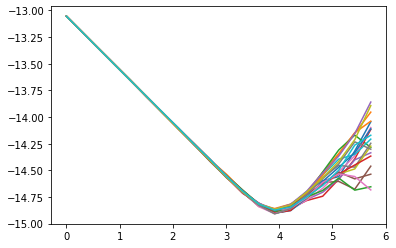

In [5]:
# calculate allan variance for original data
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(cov_mix_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_mix_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24350697e-13 8.80752439e-14 6.23060802e-14 4.40910260e-14
 3.11266743e-14 2.19407201e-14 1.53792799e-14 1.09059985e-14
 7.71291021e-15 5.47906502e-15 3.99286998e-15 2.82996605e-15
 2.10833868e-15 1.90390341e-15 2.21328429e-15 3.04565915e-15
 4.25737584e-15 6.00980892e-15 1.00532702e-14 1.81400936e-14]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24446204e-13 8.79928457e-14 6.22476655e-14 4.40577317e-14
 3.11543300e-14 2.19292335e-14 1.54548454e-14 1.09962225e-14
 7.62105651

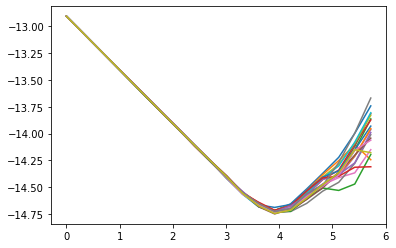

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24342341e-13 8.80206342e-14 6.22260234e-14 4.40242171e-14
 3.10215895e-14 2.19628195e-14 1.54979505e-14 1.10034500e-14
 7.78451760e-15 5.55853570e-15 3.97693535e-15 2.76315615e-15
 2.11473902e-15 1.79727244e-15 1.93646500e-15 2.50259218e-15
 3.34589547e-15 4.30404092e-15 7.07477661e-15 6.63846249e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24448291e-13 8.80019598e-14 6.22136172e-14 4.40980238e-14
 3.10891680e-14 2.19942239e-14 1.55526960e-14 1.10070500e-14
 7.83120009

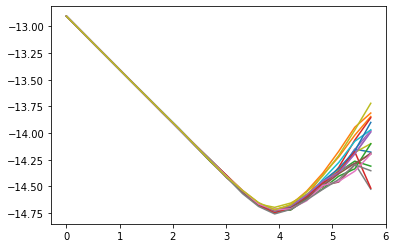

In [6]:
# calculate allan variance for minus data

for i in range(cov_data_1.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_1[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()
    
for i in range(cov_data_2.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_2[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()

### 3. 计算Gamma

#### (1) For each 2 clocks calculate (OPTION)

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [ ]:
# def rolling_diff(arr, tau = 1):
#     # tau should be the power of 2
#     # arr is a one-dimension array
#     if tau >= len(arr):
#         raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
#     else:
#         result = list()
#         for i in range(len(arr)):
#             if i + tau >= len(arr):
#                 break
#             else:
#                 result.append(arr[i + tau] - arr[i])
#         return np.array(result)

In [ ]:
# def cal_cij_and_plot(cov_data, taus):
#     C_ij_all = list()
#     for tau in taus:
#         delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
#         print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
#         result = list()
#         for i in range(delta_clocks.shape[0]):
#             for j in range(delta_clocks.shape[0]):
#                 if i < j:
#                     C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
#                     result.append(C_ij)
#         C_ij_all.append(result)
    
#     C_ij_all = np.array(C_ij_all)
#     print(C_ij_all)
#     print(C_ij_all.shape)
    
#     for i in range(cov_data.shape[0]):
#         for j in range(cov_data.shape[0]):
#             if i < j:
#                 print("row1: %s, row2: %s" % (i, j))
#                 (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#                 (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
#                 C_ij = C_ij_all[:,i+j-1]
#                 multiply_adev_ij = 2 * adevs_i * adevs_j
#                 Gamma_ij = C_ij / multiply_adev_ij
#                 print('Gamma_ij - %s' % Gamma_ij)
#                 print("----------------------------------------")
#                 plt.plot(np.log10(taus), Gamma_ij)
#             else:
#                 continue

In [ ]:
# taus = 2 ** np.arange(0,20)

In [ ]:
#cal_cij_and_plot(cov_0_data, taus)

In [ ]:
#cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [7]:
def cal_cij_and_plot2(cov_data):
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
                assert taus_i.shape == taus_j.shape == taus_ij.shape
            
                C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
            
                print('tau - %s' % taus_ij)
                print('C_ij - %s' % C_ij)
                print('multiply_adev_ij - %s' % multiply_adev_ij)
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus_ij), Gamma_ij)
            else:
                continue

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [1.54779016e-26 7.77258210e-27 3.87778749e-27 1.94212406e-27
 9.67901100e-28 4.81641494e-28 2.37357757e-28 1.20379085e-28
 5.58466366e-29 2.97681546e-29 1.47268168e-29 7.15097344e-30
 4.72167657e-30 3.95949838e-30 5.40367600e-30 1.03688033e-29
 1.76906745e-29 1.53951033e-29 2.63229946e-29 1.73872337e-28]
multiply_adev_ij - [3.09499445e-26 1.54999827e-26 7.75681608e-27 3.88510119e-27
 1.93946137e-27 9.62286348e-28 4.75368784e-28 2.39849572e-28
 1.17561049e-28 5.98877314e-29 3.07619812e-29 1.56136035e-29
 9.46821571e-30 7.30760699e-30 9.53473568e-30 1.78488734e-29
 3.52675403e-29 6.73113132e-29 1.58716567e-28 2.06905795e-28]
Gamma_ij - [0.50009465 0.50145747 0.49992    0.49989021 0.49905665 0.50051785
 0.49931288 0.50

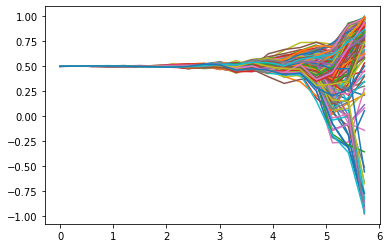

In [8]:
cal_cij_and_plot2(cov_data_1)

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [ 1.54852989e-26  7.73472838e-27  3.86056452e-27  1.93874881e-27
  9.60005528e-28  4.84716127e-28  2.45550575e-28  1.23290258e-28
  6.24374252e-29  3.06268052e-29  1.60228489e-29  8.02268745e-30
  4.91316575e-30  2.82435763e-30  2.93010287e-30  3.66904221e-30
  9.44578296e-30  1.82234994e-29  4.04289911e-29 -8.02361959e-29]
multiply_adev_ij - [3.09483835e-26 1.54919766e-26 7.74261200e-27 3.88276194e-27
 1.92887082e-27 9.66110340e-28 4.82069827e-28 2.42231049e-28
 1.21924230e-28 6.06360983e-29 3.19641163e-29 1.60133073e-29
 9.34909509e-30 6.44919616e-30 7.82181674e-30 1.29382943e-29
 2.70798644e-29 5.15167157e-29 1.35307590e-28 1.89984222e-28]
Gamma_ij - [ 0.50035889  0.49927318  0.49861268  0.49932209  0.49770338  0

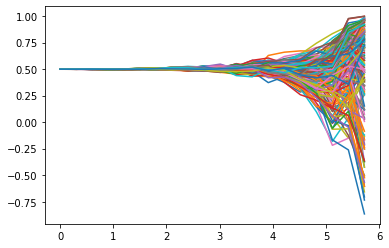

In [9]:
cal_cij_and_plot2(cov_data_2)

#### (3) For each group, calculate harmonic mean

In [10]:
def cal_var_harmonic_mean(cov_group, cov_ref = None):
    var_list = list()
    cov_data = cov_group
    if cov_ref is not None:
        cov_data = cov_group - cov_ref
    for i in range(cov_data.shape[0]):
        (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
        var_list.append(1.0 / adevs_i ** 2)
    return taus_i, (cov_data.shape[0] / np.sum(var_list, axis=0))

[1.24392828e-13 8.80796938e-14 6.22609311e-14 4.40235190e-14
 3.11134157e-14 2.19533397e-14 1.54974678e-14 1.10119246e-14
 7.74690162e-15 5.51876702e-15 3.91688298e-15 2.79047312e-15
 2.15020651e-15 1.86956951e-15 2.02077294e-15 2.64967773e-15
 3.47194996e-15 4.24797953e-15 6.09268548e-15 8.94325897e-15]


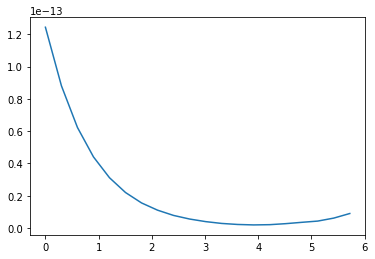

In [11]:
taus, cov_data_1_harmonic = cal_var_harmonic_mean(cov_data_1)
print(np.sqrt(cov_data_1_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_1_harmonic))

[1.24459640e-13 8.80015003e-14 6.21950459e-14 4.39783711e-14
 3.10956748e-14 2.20206582e-14 1.55784040e-14 1.10338832e-14
 7.78514355e-15 5.51896539e-15 3.92677914e-15 2.82686331e-15
 2.14789550e-15 1.85831393e-15 2.01000382e-15 2.52652366e-15
 3.37799406e-15 4.39355401e-15 6.18804418e-15 6.16951219e-15]


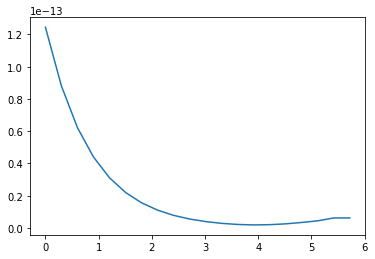

In [12]:
taus, cov_data_2_harmonic = cal_var_harmonic_mean(cov_data_2)
print(np.sqrt(cov_data_2_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_2_harmonic))

### 4. 带入模型进行测试

In [13]:
cov_data = cov_data_1
y_t = cov_data.T
clock_size = y_t.shape[1]

In [14]:
regularization = False
subset_size_list = [5, 10]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [8.60301900e-14 7.13860984e-14 4.47485127e-14 2.52533018e-14
 1.74787037e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [8.75374836e-14 7.31965041e-14 4.47229941e-14 2.62943398e-14
 1.83280150e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [8.69649969e-14 7.37213105e-14 5.38365442e-14 2.87995488e-14
 2.53870093e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.07431519e-13 8.58851229e-14 6.02638379e-14 1.92577480e-14
 1.19960123e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.05613863e-13 1.02948308e-13 7.35701266e-14 1.94752137e-14
 2.41847018e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.07921002e-13 1.01099970e-13 6.62473414e-14 3.17425879e-14
 3.19227019e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.03060397e-13 7.21279711e-14 5.39915727e-14 3.65470835e-14
 1.11629707e-14]
taus - [

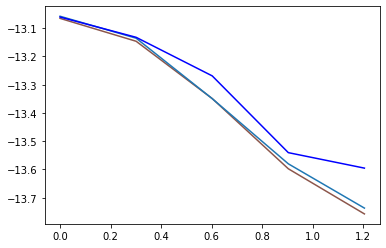

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.52347846e-14 6.27843309e-14 3.49241047e-14 2.90292032e-14
 2.52111217e-14 2.30432325e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.50787613e-14 6.25912432e-14 3.45689994e-14 2.91118678e-14
 2.46778824e-14 2.64411879e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.91820672e-14 6.79268432e-14 6.22957842e-14 2.65034569e-14
 1.74052149e-14 1.15907805e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.35287353e-13 8.73345578e-14 5.58881468e-14 5.73314283e-14
 4.86842921e-14 2.26393400e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.19491823e-13 8.78424158e-14 6.42121510e-14 4.91906477e-14
 2.36417536e-14 1.39612532e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.24288614e-13 1.16157684e-13 6.07281302e-14 3.83131509e-14
 3.29762300e-14 2.88927770e-14

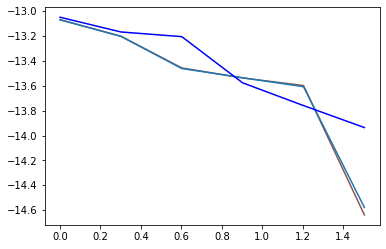

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.74338764e-14 6.53900317e-14 4.87543225e-14 3.11319294e-14
 2.42082811e-14 1.09628583e-14 1.17510106e-14 1.46108087e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.75574091e-14 6.56773734e-14 4.88447826e-14 3.11997369e-14
 2.35642099e-14 1.08631325e-14 1.14392955e-14 1.01970963e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.30312483e-14 6.36086583e-14 4.65479281e-14 3.26162966e-14
 1.97261070e-14 1.65844270e-14 1.16701802e-14 9.57669832e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.19332275e-13 8.54538178e-14 6.49263728e-14 4.26997814e-14
 2.46131538e-14 1.54979180e-14 1.32837375e-14 7.30125582e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.19795685e-13 8.58912621

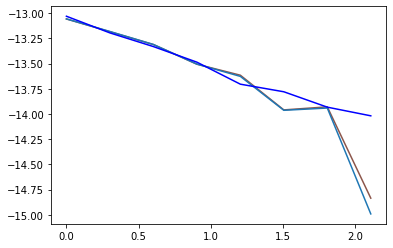

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [8.82717077e-14 6.36546228e-14 4.41390365e-14 3.24671933e-14
 2.24578169e-14 1.64976004e-14 1.44175236e-14 1.23127219e-14
 5.81452134e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [8.88826579e-14 6.41902969e-14 4.44764418e-14 3.26740517e-14
 2.24842572e-14 1.67563258e-14 1.45814095e-14 1.26035698e-14
 6.47167546e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [8.94099188e-14 6.60721818e-14 4.65696100e-14 3.03111703e-14
 2.18730420e-14 1.34901699e-14 9.33427659e-15 8.08667726e-15
 8.89852983e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [1.22046194e-13 8.79978759e-14 6.47548168e-14 4.15116098e-14
 2.59488550e-14 1.86360323e-14 1.74406272e-14 9.36823854e-15
 4.17625870e-15]
t

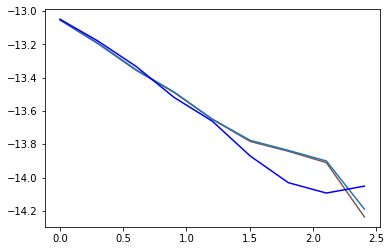

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.01633787e-14 6.41151442e-14 4.37536898e-14 3.03897104e-14
 2.16346956e-14 1.62219186e-14 1.11303099e-14 6.73432568e-15
 5.57348891e-15 3.59272271e-15 5.77541343e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.06683946e-14 6.43079980e-14 4.39979819e-14 3.05564508e-14
 2.16878996e-14 1.64518980e-14 1.12578386e-14 6.79770493e-15
 5.53646804e-15 3.70992451e-15 5.92395017e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [8.90808036e-14 6.41667177e-14 4.67190548e-14 3.34813729e-14
 2.07956640e-14 1.44857597e-14 9.73840532e-15 6.94651805e-15


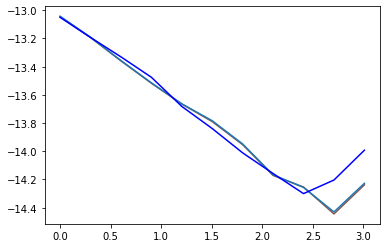

6000 600


In [ ]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')

In [18]:
cov_data = cov_data_2
y_t = cov_data.T
clock_size = y_t.shape[1]

In [19]:
regularization = False
subset_size_list = [5, 10]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.11492219e-13 5.90502112e-14 4.64086909e-14 3.68379541e-14
 2.01273894e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.11812073e-13 6.01895434e-14 4.50577724e-14 3.66800042e-14
 1.98979047e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [9.46109647e-14 7.81904278e-14 5.97076372e-14 2.74953799e-14
 1.04651590e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.04150085e-13 8.74650966e-14 6.55078530e-14 4.43209902e-14
 1.41203994e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.25636727e-13 8.18707724e-14 5.21183681e-14 4.77383102e-14
 1.25446142e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.01141659e-13 9.04943008e-14 9.70085541e-14 4.18786367e-14
 3.82959723e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.08242036e-13 7.68931457e-14 6.39442105e-14 4.08017514e-14
 2.26999279e-14]
taus - [

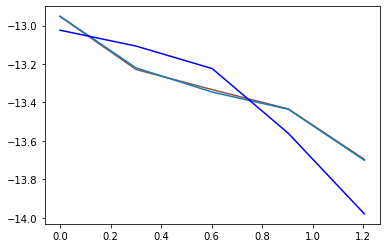

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.02354715e-13 6.28043315e-14 4.27916774e-14 2.05749296e-14
 1.84594455e-14 1.52932060e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.01740538e-13 6.19310385e-14 4.22429319e-14 2.07933877e-14
 1.90790297e-14 1.54387279e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.73106635e-14 6.66102880e-14 5.38176218e-14 3.03604305e-14
 1.93941226e-14 1.10932938e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.33501120e-13 8.71384934e-14 5.57023535e-14 4.24026890e-14
 3.85409553e-14 2.89479289e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.29622100e-13 7.70397260e-14 4.43442474e-14 3.71834014e-14
 2.71548080e-14 1.13886027e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.14259943e-13 8.11434989e-14 7.52416265e-14 5.77164000e-14
 3.99649176e-14 2.74549708e-14

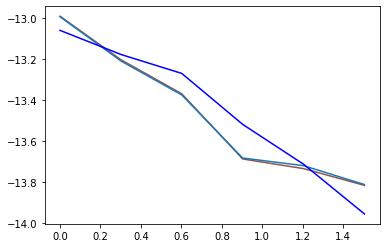

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.11082994e-14 6.06985505e-14 4.74275022e-14 3.18778155e-14
 2.50821807e-14 1.81384815e-14 7.65438175e-15 3.19378458e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.09601076e-14 6.12366058e-14 4.78719906e-14 3.20152202e-14
 2.54246873e-14 1.77738359e-14 7.31971249e-15 3.43990276e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.35093536e-14 6.40585543e-14 4.44056599e-14 2.91489484e-14
 1.62868438e-14 1.13737962e-14 1.00425055e-14 9.43095008e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.22193111e-13 8.21395885e-14 6.31342320e-14 5.06279000e-14
 2.92123059e-14 1.88347469e-14 1.15829151e-14 6.87443806e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.26053996e-13 9.01353833

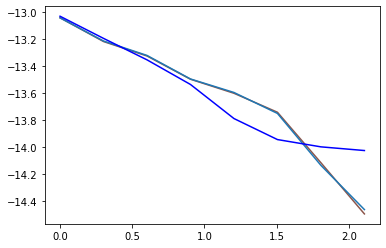

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.07439938e-14 6.42903914e-14 3.97615770e-14 3.14202235e-14
 2.05344366e-14 1.37185605e-14 1.33968637e-14 1.03001048e-14
 7.00513755e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.10417466e-14 6.45142870e-14 3.98567439e-14 3.17091340e-14
 2.07323391e-14 1.37220802e-14 1.35764386e-14 1.04613939e-14
 6.98857492e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.11865359e-14 6.64167398e-14 4.72326690e-14 2.77996147e-14
 1.96293076e-14 1.32319790e-14 1.13608679e-14 8.36173850e-15
 8.23091894e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [1.24021694e-13 8.58030384e-14 6.18611244e-14 4.56951760e-14
 2.73253826e-14 2.00108657e-14 1.85845955e-14 8.64500222e-15
 6.29977980e-15]
t

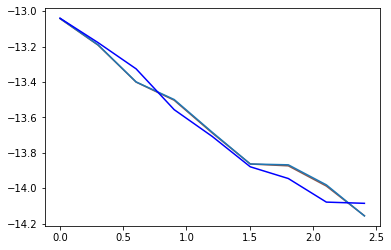

9000 1800


In [ ]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')